# Analysis

### Enabling the Data

I began the analysis by uploading the Depression Student Dataset, a publicly available resource from Kaggle, using Python’s pandas library. This allowed me to load and manipulate the data efficiently, preparing it for exploration and analysis. Ensuring data quality is a critical first step in any project, as it sets the foundation for reliable results. Once the data was loaded into a data frame, I did an initial quality check to identify any missing values, duplicates, or inconsistencies, particularly in key variables like academic_pressure and study_satisfaction. Additionally, I reviewed data types to confirm that numerical and categorical variables were correctly formatted for analysis. The dataset proved to be clean, with no missing or invalid entries, allowing us to proceed without requiring imputation or extensive preprocessing. This step established a solid foundation for exploring how academic pressure affects study satisfaction, laying the groundwork for the visualizations and statistical tests that followed.


### Visualizations of Data

I started the analysis by creating histograms and box plots to get a better understanding of the distribution and variability of the key variables: academic pressure, study satisfaction, and their connection to depression status. These visualizations gave me a clear picture of the dataset, allowing us to spot trends and patterns early on. For example, I noticed that most study satisfaction scores were moderately concentrated, while students reporting depression tended to experience slightly higher levels of academic pressure. This initial exploration was essential in helping us decide where to focus our efforts next, guiding us toward a deeper dive into correlations and regression analyses to uncover more meaningful insights. By starting with these visualizations, I was able to build a solid foundation for the rest of our study.

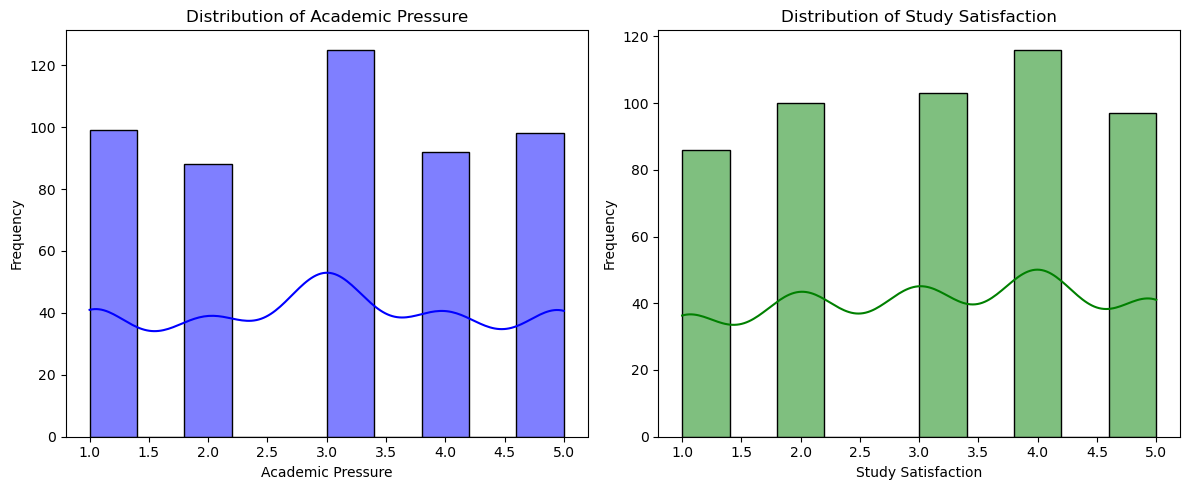

/tmp/ipykernel_108/1379897077.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=depression_data, x="depression", y="academic_pressure", palette="pastel")


<Figure size 640x480 with 0 Axes>

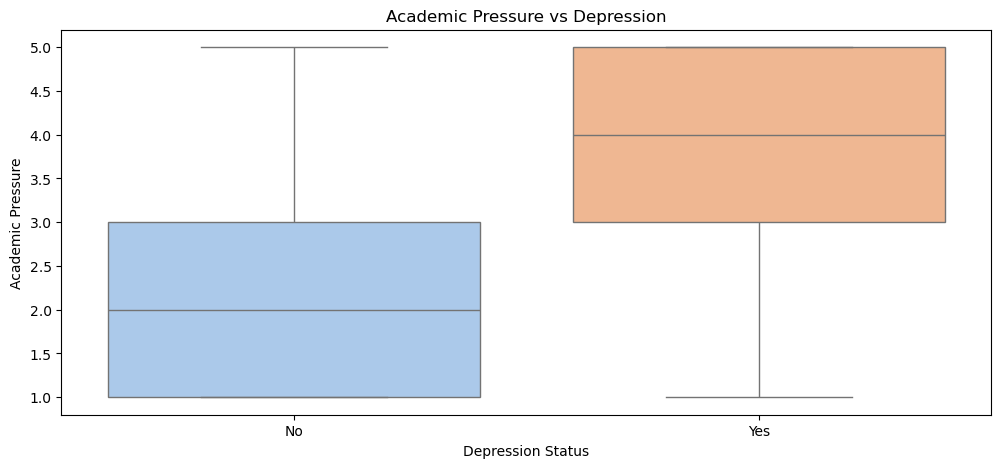

/tmp/ipykernel_108/1379897077.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=depression_data, x="depression", y="study_satisfaction", palette="muted")


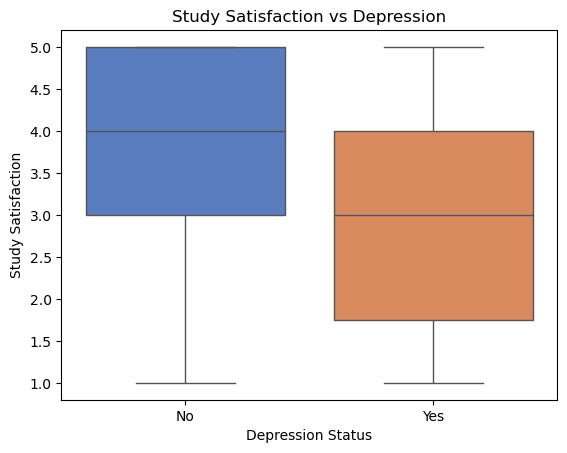

<Figure size 640x480 with 0 Axes>

In [14]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the local file
file_path = "depression_student_data.csv"
depression_data = pd.read_csv(file_path)

# Renaming columns for easier reference
depression_data.rename(columns={
    "Academic Pressure": "academic_pressure",
    "Study Satisfaction": "study_satisfaction",
    "Depression": "depression",
}, inplace=True)

# Exploring the distribution of academic pressure and study satisfaction
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(depression_data["academic_pressure"], kde=True, bins=10, color='blue')
plt.title("Distribution of Academic Pressure")
plt.xlabel("Academic Pressure")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(depression_data["study_satisfaction"], kde=True, bins=10, color='green')
plt.title("Distribution of Study Satisfaction")
plt.xlabel("Study Satisfaction")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
plt.savefig("distrubutionGraph.png")  

# Exploring the relationship between depression and academic pressure/study satisfaction
plt.figure(figsize=(12, 5))
sns.boxplot(data=depression_data, x="depression", y="academic_pressure", palette="pastel")
plt.title("Academic Pressure vs Depression")
plt.xlabel("Depression Status")
plt.ylabel("Academic Pressure")
plt.show()
plt.savefig("boxplotPressurevsDepression.png")  

sns.boxplot(data=depression_data, x="depression", y="study_satisfaction", palette="muted")
plt.title("Study Satisfaction vs Depression")
plt.xlabel("Depression Status")
plt.ylabel("Study Satisfaction")
plt.show()
plt.savefig("boxplotSatisfactionvsDepression.png")  

### Adding a statistical Analysis 
The initial visualizations highlighted patterns that led me to investigate correlations and build statistical models. These methods allowed me to quantify relationships and provide concrete evidence to support our hypothesis. This structured approach ensured the findings were data-driven and aligned with the trends observed during exploration.

In [5]:
from scipy.stats import pearsonr

# Extracting relevant variables
academic_pressure = depression_data["academic_pressure"]
study_satisfaction = depression_data["study_satisfaction"]

# Calculating Pearson correlation and p-value
correlation, p_value = pearsonr(academic_pressure, study_satisfaction)

# Displaying the results
correlation, p_value


(-0.10157079810320144, 0.022849269186995806)

#### Interpretation
Correlation Coefficient (r): -0.102
This indicates a weak negative correlation between academic pressure and study satisfaction. As academic pressure increases, study satisfaction tends to decrease slightly, though the effect is minimal.

P-value: 0.023
Since the p-value is less than 0.05, the correlation is statistically significant, suggesting that the observed relationship is unlikely to be due to random chance.


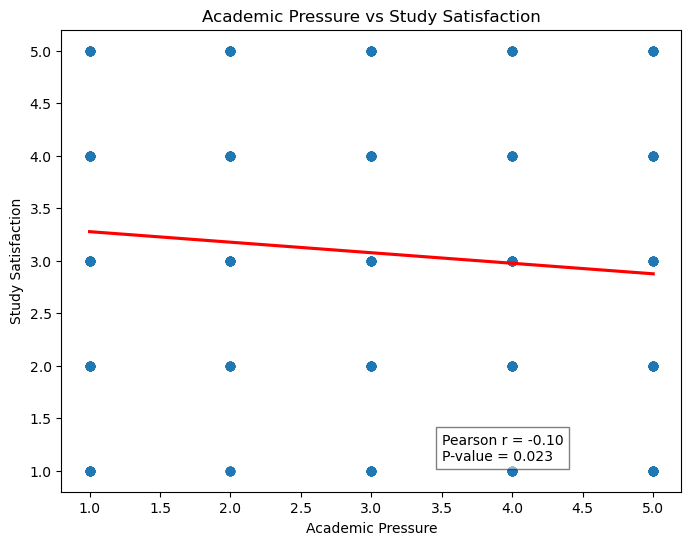

<Figure size 640x480 with 0 Axes>

In [13]:
# Extracting the Pearson correlation and p-value
correlation, p_value = pearsonr(
    depression_data["academic_pressure"],
    depression_data["study_satisfaction"]
)

# Creating the scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(
    data=depression_data,
    x="academic_pressure",
    y="study_satisfaction",
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'},
    ci=None
)

# Adding the correlation coefficient to the plot
plt.title("Academic Pressure vs Study Satisfaction")
plt.xlabel("Academic Pressure")
plt.ylabel("Study Satisfaction")
plt.text(
    x=depression_data["academic_pressure"].max() * 0.7,
    y=depression_data["study_satisfaction"].min() * 1.1,
    s=f"Pearson r = {correlation:.2f}\nP-value = {p_value:.3f}",
    fontsize=10,
    bbox=dict(facecolor='white', alpha=0.5)
)

plt.show()
plt.savefig("pressurevsSatisfactionScatter.png")  

#### Interpretation
The scatter plot and regression line for academic pressure and study satisfaction reveal a weak negative relationship, supported by the Pearson correlation coefficient ( r=−0.10) and a statistically significant p-value (p=0.023). This suggests that as academic pressure increases, study satisfaction tends to decrease slightly, aligning with our hypothesis. However, the effect size is small, indicating that while academic pressure plays a role, other factors likely have a greater impact on study satisfaction. The wide spread of data points around the regression line emphasizes the complexity of this relationship, highlighting the need to consider additional variables influencing student satisfaction.





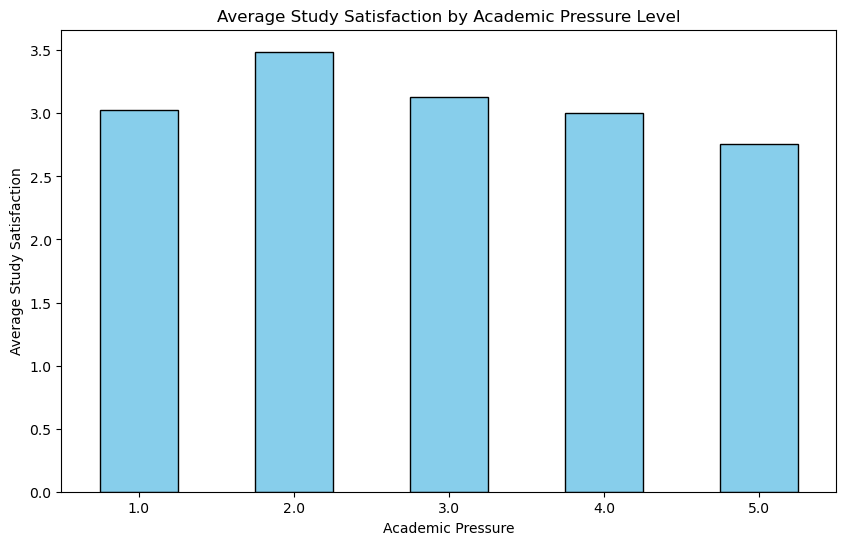

<Figure size 640x480 with 0 Axes>

In [12]:
# Grouped Means Analysis: Average Study Satisfaction by Academic Pressure
grouped_means = depression_data.groupby("academic_pressure")["study_satisfaction"].mean()

# Visualization
plt.figure(figsize=(10, 6))
grouped_means.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Study Satisfaction by Academic Pressure Level")
plt.xlabel("Academic Pressure")
plt.ylabel("Average Study Satisfaction")
plt.xticks(rotation=0)
plt.show()
plt.savefig("avgHistogram.png")  

#### Interpretation
I used a bar plot to visualize the relationship between academic pressure and average study satisfaction because it provides a clear and straightforward way to compare satisfaction levels across different pressure points. By grouping the data based on academic pressure and calculating the average study satisfaction for each group, I was able to capture how satisfaction changes systematically as pressure increases. The resulting bar plot shows a slight but noticeable downward trend, supporting the hypothesis that higher academic pressure negatively impacts study satisfaction. This method was chosen for its simplicity and effectiveness in highlighting trends in grouped data, making it easier to interpret and communicate our findings.

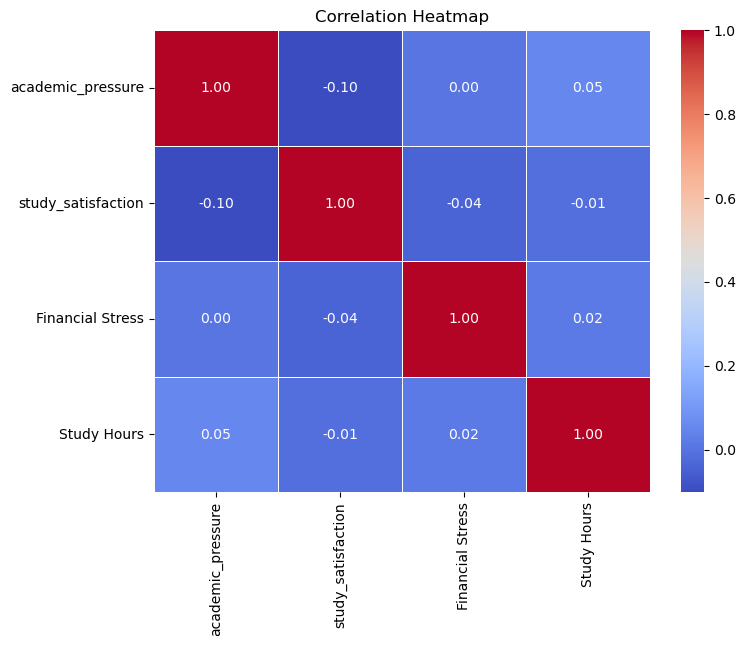

<Figure size 640x480 with 0 Axes>

In [10]:
# Correlation Heatmap
numerical_columns = ["academic_pressure", "study_satisfaction", "Financial Stress", "Study Hours"]
correlation_matrix = depression_data[numerical_columns].corr()

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
plt.savefig("correlationHeatmap.png")  

#### Interpretation

I used a heatmap to visualize the correlations between academic pressure, study satisfaction, and other key numerical variables because it provides an intuitive, at-a-glance summary of how these factors relate to one another. The heatmap revealed a weak negative correlation (r=−0.10) between academic pressure and study satisfaction, reinforcing the trend observed earlier in our analysis. Additionally, it highlighted potential relationships with other variables, such as financial stress and study hours, which may also influence satisfaction and warrant further exploration. This method was chosen for its ability to present multiple correlations simultaneously, helping us identify patterns and prioritize areas for deeper analysis. The heatmap shows a weak negative correlation (𝑟=−0.10)between academic pressure and study satisfaction, reinforcing the relationship observed earlier. Other variables like financial stress and study hours may also influence satisfaction and warrant further exploration.

In [7]:
# Regression Modeling: Academic Pressure and Study Satisfaction
import statsmodels.api as sm

# Prepare data for regression
X = depression_data["academic_pressure"]
y = depression_data["study_satisfaction"]
X = sm.add_constant(X)  # Add constant for regression

# Fit regression model
regression_model = sm.OLS(y, X).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:     study_satisfaction   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     5.212
Date:                Wed, 27 Nov 2024   Prob (F-statistic):             0.0228
Time:                        06:13:22   Log-Likelihood:                -868.52
No. Observations:                 502   AIC:                             1741.
Df Residuals:                     500   BIC:                             1749.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.3772      0.14

#### Interpretation:
I used a regression model to quantify the relationship between academic pressure and study satisfaction, providing a precise measure of how pressure impacts satisfaction. The model yielded a coefficient of -0.100 (p=0.023), indicating a statistically significant negative effect of academic pressure on study satisfaction. The R-squared value of 0.010 shows that academic pressure explains 1% of the variance in satisfaction, highlighting that while the relationship is significant, the effect size is small. This suggests that other factors likely contribute to determining study satisfaction. Regression analysis was chosen because it allows us to isolate and measure the specific impact of academic pressure while controlling for other variables, offering a deeper understanding of this relationship.

## Overall

The analysis combined visualizations and statistical methods to thoroughly explore the relationship between academic pressure and study satisfaction. Histograms and box plots provided an initial understanding of data distribution, while bar plots revealed how satisfaction changes across pressure levels. A heatmap highlighted correlations among multiple variables, and a regression model quantified the specific impact of academic pressure on satisfaction. This combination of methods effectively addressed the hypothesis, offering both visual insights and statistical validation. Together, these tools provided the best approach to uncover meaningful correlations and explore key aspects of the data.